# Pokemon

## Data content

This database includes 21 variables per each of the 721 Pokémon of the first six generations, plus the Pokémon ID and its name. These variables are briefly described next:

    Number. Pokémon ID in the Pokédex.
    Name. Name of the Pokémon.
    Type_1. Primary type.
    Type_2. Second type, in case the Pokémon has it.
    Total. Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).
    HP. Base Health Points.
    Attack. Base Attack.
    Defense. Base Defense.
    Sp_Atk. Base Special Attack.
    Sp_Def. Base Special Defense.
    Speed. Base Speed.
    Generation. Number of the generation when the Pokémon was introduced.
    isLegendary. Boolean that indicates whether the Pokémon is Legendary or not.
    Color. Colour of the Pokémon according to the Pokédex.
    hasGender. Boolean that indicates if the Pokémon can be classified as female or male.
    Pr_male. In case the Pokémon has Gender, the probability of its being male. The probability of being female is, of course, 1 minus this value.
    EggGroup1. Egg Group of the Pokémon.
    EggGroup2. Second Egg Group of the Pokémon, in case it has two.
    hasMegaEvolution. Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
    Height_m. Height of the Pokémon, in meters.
    Weight_kg. Weight of the Pokémon, in kilograms.
    Catch_Rate. Catch Rate.
    Body_Style. Body Style of the Pokémon according to the Pokédex.

## Prepare data

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../input/pokemon-datasets-for-ml/train_pokemon.csv')
test = pd.read_csv('../input/pokemon-datasets-for-ml/test_pokemon.csv')

In [3]:
train.head(3)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,shuffle
0,696,Tyrunt,Rock,Dragon,362,58,89,77,45,45,...,True,0.875,Monster,Dragon,False,0.79,26.0,45,bipedal_tailed,0.806833
1,271,Lombre,Water,Grass,340,60,50,50,60,70,...,True,0.500,Water_1,Grass,False,1.19,32.5,120,bipedal_tailless,0.846142
2,335,Zangoose,Normal,NaN,458,73,115,60,60,60,...,True,0.500,Field,NaN,False,1.30,40.3,90,bipedal_tailed,0.414744


In [4]:
train.shape

(577, 24)

In [5]:
train.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate,shuffle
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,512.000000,577.000000,577.000000,577.000000,577.000000
mean,365.173310,421.844021,68.736568,75.944541,71.135182,69.908146,69.885615,66.233969,3.350087,0.553711,1.186118,60.791508,99.535529,0.492639
std,207.850969,109.397402,25.911574,28.915893,29.712554,28.978504,27.363692,27.183131,1.668375,0.199488,1.124625,95.910128,76.706891,0.282454
min,3.000000,195.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000,0.000197
25%,183.000000,325.000000,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.900000,45.000000,0.248779
50%,366.000000,430.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,29.500000,60.000000,0.487075
75%,544.000000,500.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.500000,64.800000,180.000000,0.739929
max,721.000000,720.000000,255.000000,160.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000,0.997422


In [6]:
# describe(include = ['O']) will show the descriptive statistics of object data types.
train.describe(include=['O'])

,Name,Type_1,Type_2,Color,Egg_Group_1,Egg_Group_2,Body_Style
count,577,577,286,577,577,153,577
unique,577,18,18,10,14,13,14
top,Marowak,Water,Flying,Blue,Field,Dragon,bipedal_tailed
freq,1,83,71,112,131,32,124


<AxesSubplot:>

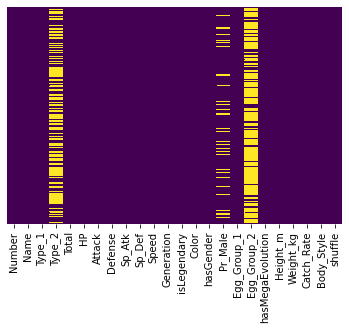

In [7]:
# check for missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's fill the rows in `Type_2` column that are currently null with `None`. 

In [8]:
def fill_type_2(cols):
    type_2 = cols[0]
    if pd.isnull(type_2):
        return "None"
    else:
        return type_2

In [9]:
train['Type_2'] = train[['Type_2']].apply(fill_type_2,axis=1)

Because the majority of the `Egg_Group_2` is `NaN`, we will drop from the dataset as it will not be of any help. Then, we will be in a position to start investigating our data.

In [10]:
train.drop(columns=['Egg_Group_2'], inplace=True)

<AxesSubplot:>

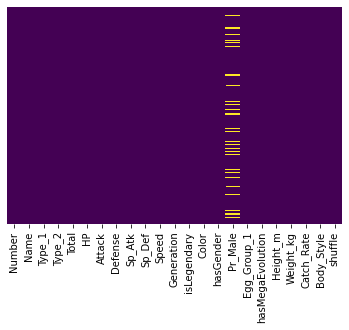

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Relationship between Features and Legendary

In this section, we will analyse the relationship between different features with respect to `isLegendary`.

In [12]:
legendary = train[train['isLegendary'] == 1]
not_legendary = train[train['isLegendary'] == 0]

print("Legendary: %i (%.1f%%)"%(len(legendary), float(len(legendary))/len(train)*100.0))
print("Not Legendary: %i (%.1f%%)"%(len(not_legendary), float(len(not_legendary))/len(train)*100.0))
print("Total: %i"%len(train))

Legendary: 41 (7.1%)
Not Legendary: 536 (92.9%)
Total: 577


In [13]:
train.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'hasMegaEvolution',
       'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style', 'shuffle'],
      dtype='object')

## Correlating Features

Heatmap of Correlation between different features:
   - Positive numbers = Positive correlation, i.e. increase in one feature will increase the other feature & vice-versa.
   - Negative numbers = Negative correlation, i.e. increase in one feature will decrease the other feature & vice-versa.

In our case, we focus on which features have strong positive or negative correlation with the Survived feature.

<AxesSubplot:>

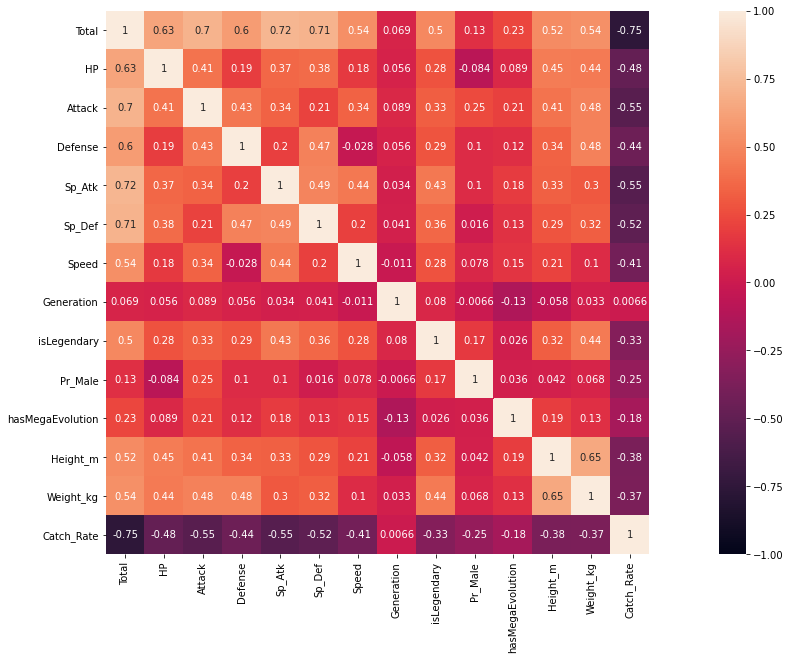

In [14]:
plt.figure(figsize=(25,10))
train2 = train.drop(['Number','Name','hasGender','shuffle'], axis=1)
sns.heatmap(train2.corr(), vmin= -1, vmax=1, square=True, annot=True)

Apparently, some feature have no correlation with legendary. These features are `hasMegaEvolution`,`Generation`.

Text(0.5, 1.0, 'Type_2 Distribution on Legendary')

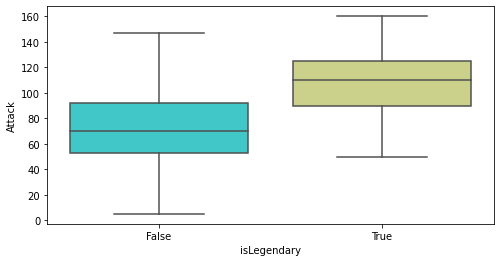

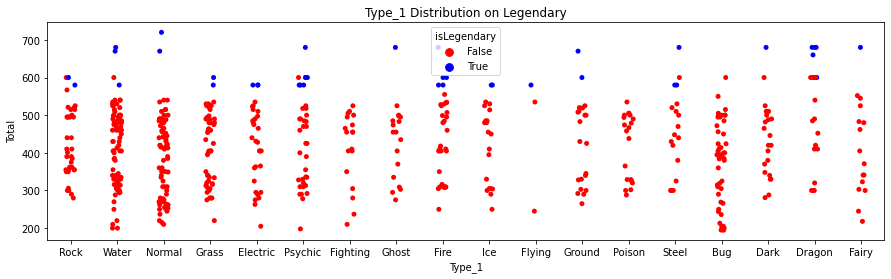

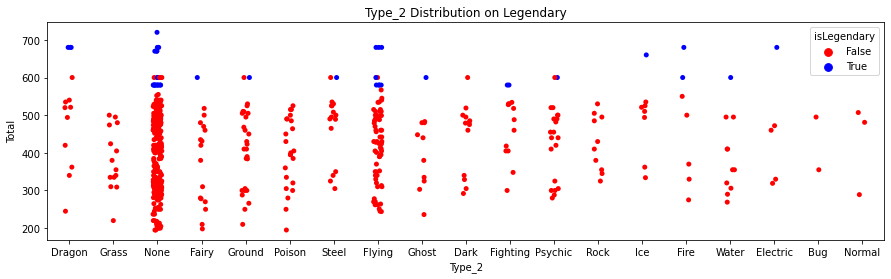

In [15]:
#boxplot of Attack vs. Legendary
plt.figure(figsize=(8, 4))
sns.boxplot(x='isLegendary',y='Attack',data=train, palette='rainbow')

#stripplot of Attack vs. Legendary
plt.figure(figsize=(15, 4))
sns.stripplot(x='Type_1',y='Total',data=train, jitter=True,hue='isLegendary',palette=['r','b'],dodge=False).set_title('Type_1 Distribution on Legendary')

#stripplot of Attack vs. Legendary
plt.figure(figsize=(15, 4))
sns.stripplot(x='Type_2',y='Total',data=train, jitter=True,hue='isLegendary',palette=['r','b'],dodge=False).set_title('Type_2 Distribution on Legendary')

### Type_1 vs Lengendary

<AxesSubplot:xlabel='Type_1'>

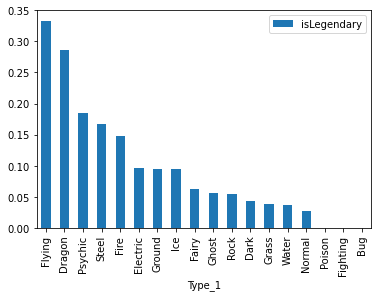

In [16]:
type_1 = train[['Type_1','isLegendary']].groupby(['Type_1'], as_index=False).mean().set_index('Type_1')
type_1.sort_values(by='isLegendary',ascending=False).plot(kind='bar')

It seems that most legendary Pokemons are also a Flying type, followed by the Dragon type. There are no legendary Poison, Fighting or Bug types. Still, `Type_1` feature can be useful to predict legendary Pokemons.

<AxesSubplot:xlabel='Type_2'>

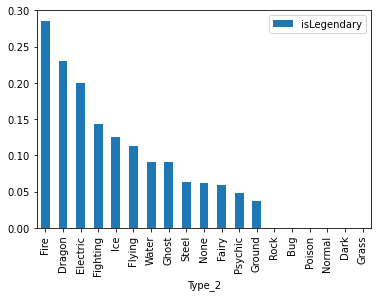

In [17]:
type_2 = train[['Type_2','isLegendary']].groupby(['Type_2'], as_index=False).mean().set_index('Type_2')
type_2.sort_values(by='isLegendary',ascending=False).plot(kind='bar')

Like Type_1, `Type_2` can be useful to predict legendary Pokemons.

## Feature Extraction

In this section, we select the appropriate features to train our classifier. Here, we create new features based on existing features. We also convert categorical features into numeric form.

In [18]:
train_test_data = [train, test]

In [19]:
for dataset in train_test_data:
    dataset['isLegendary'] = dataset['isLegendary'].map({True: 1, False: 0}).astype(int)

In [20]:
type_1.sort_values(by='isLegendary',ascending=False)

,isLegendary
Type_1,
Flying,0.333333
Dragon,0.285714
Psychic,0.184211
Steel,0.166667
Fire,0.147059
Electric,0.096774
Ground,0.095238
Ice,0.095238
Fairy,0.062500


After that, we convert the categorical Title values into numeric form.

In [21]:
type_1_mapping = {"Fire": 1, "Dragon": 2, "Electric": 3, "Fighting": 4, "Ice": 5, "Flying": 6, "Water": 7, "Ghost": 8, "Steel": 9, "None": 10, "Fairy": 11, "Psychic": 12, "Ground": 13, "Rock": 14, "Bug": 15, "Poison": 16, "Normal": 17, "Dark": 18, "Grass": 19}
for dataset in train_test_data:
    dataset['Type_1'] = dataset['Type_1'].map(type_1_mapping)
    dataset['Type_1'] = dataset['Type_1'].fillna(0)

Now, let's do the same thing for `Type_2`. Luckily, both `Type_1` and `Type_2` have the same Pokemon types, so we can just copy & paste and replace `Type_1` for `Type_2`. 

In [22]:
type_2_mapping = {"Fire": 1, "Dragon": 2, "Electric": 3, "Fighting": 4, "Ice": 5, "Flying": 6, "Water": 7, "Ghost": 8, "Steel": 9, "None": 10, "Fairy": 11, "Psychic": 12, "Ground": 13, "Rock": 14, "Bug": 15, "Poison": 16, "Normal": 17, "Dark": 18, "Grass": 19}
for dataset in train_test_data:
    dataset['Type_2'] = dataset['Type_2'].map(type_2_mapping)
    dataset['Type_2'] = dataset['Type_2'].fillna(0)

### Pr_Male

We first fill the NULL values of `Pr_Male` with a random number between (mean_Pr_Male - std_Pr_Male) and (mean_Pr_Male + std_Pr_Male). Then, we create a new column named Pr_Male_Band. This categorises Pr_Male into different ranges.

In [23]:
for dataset in train_test_data:
    pr_male_avg = dataset['Pr_Male'].mean()
    pr_male_std = dataset['Pr_Male'].std()
    pr_male_null_count = dataset['Pr_Male'].isnull().sum()
    
    pr_male_null_random_list = np.random.uniform(pr_male_avg - pr_male_std, pr_male_avg + pr_male_std, pr_male_null_count)
    dataset['Pr_Male'][np.isnan(dataset['Pr_Male'])] = pr_male_null_random_list
    dataset['Pr_Male'] = dataset['Pr_Male'].astype(int)
    
train['Pr_Male_Band'] = pd.cut(train['Pr_Male'], 5)

print(train[['Pr_Male_Band', 'isLegendary']].groupby(['Pr_Male_Band'], as_index=False).mean())

    Pr_Male_Band  isLegendary
0  (-0.001, 0.2]     0.065954
1     (0.2, 0.4]          NaN
2     (0.4, 0.6]          NaN
3     (0.6, 0.8]          NaN
4     (0.8, 1.0]     0.250000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Now, we map `Pr_Male` according to `Pr_Male_Band`.

In [24]:
for dataset in train_test_data:
    dataset.loc[ dataset['Pr_Male'] <= 0.2, 'Pr_Male'] = 0
    dataset.loc[(dataset['Pr_Male'] > 0.2) & (dataset['Pr_Male'] <= 0.4), 'Pr_Male'] = 1
    dataset.loc[(dataset['Pr_Male'] > 0.4) & (dataset['Pr_Male'] <= 0.6), 'Pr_Male'] = 2
    dataset.loc[(dataset['Pr_Male'] > 0.6) & (dataset['Pr_Male'] <= 0.8), 'Pr_Male'] = 3
    dataset.loc[ dataset['Pr_Male'] >= 1, 'Pr_Male'] = 4

### Attack & Defense

In [25]:
for dataset in train_test_data:
    attack_avg = dataset['Attack'].mean()
    attack_std = dataset['Attack'].std()
    attack_null_count = dataset['Attack'].isnull().sum()
    
    attack_null_random_list = np.random.randint(attack_avg - attack_std, attack_avg + attack_std, attack_null_count)
    dataset['Attack'][np.isnan(dataset['Attack'])] = attack_null_random_list
    dataset['Attack'] = dataset['Attack'].astype(int)
    
train['Attack_Band'] = pd.cut(train['Attack'], 5)

print(train[['Attack_Band', 'isLegendary']].groupby(['Attack_Band'], as_index=False).mean())

      Attack_Band  isLegendary
0   (4.845, 36.0]     0.000000
1    (36.0, 67.0]     0.005000
2    (67.0, 98.0]     0.050505
3   (98.0, 129.0]     0.196262
4  (129.0, 160.0]     0.321429


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [26]:
for dataset in train_test_data:
    dataset.loc[ dataset['Attack'] <= 36, 'Attack'] = 0
    dataset.loc[(dataset['Attack'] > 36) & (dataset['Attack'] <= 67), 'Attack'] = 1
    dataset.loc[(dataset['Attack'] > 67) & (dataset['Attack'] <= 98), 'Attack'] = 2
    dataset.loc[(dataset['Attack'] > 98) & (dataset['Attack'] <= 129), 'Attack'] = 3
    dataset.loc[ dataset['Attack'] >= 129, 'Attack'] = 4

In [27]:
for dataset in train_test_data:
    defense_avg = dataset['Defense'].mean()
    defense_std = dataset['Defense'].std()
    defense_null_count = dataset['Defense'].isnull().sum()
    
    defense_null_random_list = np.random.randint(defense_avg - defense_std, defense_avg + defense_std, defense_null_count)
    dataset['Defense'][np.isnan(dataset['Defense'])] = defense_null_random_list
    dataset['Defense'] = dataset['Defense'].astype(int)
    
train['Defense_Band'] = pd.cut(train['Defense'], 5)

print(train[['Defense_Band', 'isLegendary']].groupby(['Defense_Band'], as_index=False).mean())

     Defense_Band  isLegendary
0   (4.775, 50.0]     0.006061
1    (50.0, 95.0]     0.056604
2   (95.0, 140.0]     0.234568
3  (140.0, 185.0]     0.200000
4  (185.0, 230.0]     0.333333


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [28]:
for dataset in train_test_data:
    dataset.loc[ dataset['Defense'] <= 50, 'Defense'] = 0
    dataset.loc[(dataset['Defense'] > 50) & (dataset['Defense'] <= 95), 'Defense'] = 1
    dataset.loc[(dataset['Defense'] > 95) & (dataset['Defense'] <= 140), 'Defense'] = 2
    dataset.loc[(dataset['Defense'] > 140) & (dataset['Defense'] <= 230), 'Defense'] = 3
    dataset.loc[ dataset['Defense'] >= 230, 'Defense'] = 4

### Catch Rate %

In [29]:
for dataset in train_test_data:
    cr_avg = dataset['Catch_Rate'].mean()
    cr_std = dataset['Catch_Rate'].std()
    cr_null_count = dataset['Catch_Rate'].isnull().sum()
    
    cr_null_random_list = np.random.randint(cr_avg - cr_std, cr_avg + cr_std, cr_null_count)
    dataset['Catch_Rate'][np.isnan(dataset['Catch_Rate'])] = cr_null_random_list
    dataset['Catch_Rate'] = dataset['Catch_Rate'].astype(int)
    
train['Catch_Rate_Band'] = pd.cut(train['Catch_Rate'], 5)

print(train[['Catch_Rate_Band', 'isLegendary']].groupby(['Catch_Rate_Band'], as_index=False).mean())

  Catch_Rate_Band  isLegendary
0   (2.748, 53.4]     0.163347
1   (53.4, 103.8]     0.000000
2  (103.8, 154.2]     0.000000
3  (154.2, 204.6]     0.000000
4  (204.6, 255.0]     0.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [30]:
for dataset in train_test_data:
    dataset.loc[ dataset['Catch_Rate'] <= 53, 'Catch_Rate'] = 0
    dataset.loc[(dataset['Catch_Rate'] > 53) & (dataset['Catch_Rate'] <= 104), 'Catch_Rate'] = 1
    dataset.loc[(dataset['Catch_Rate'] > 104) & (dataset['Catch_Rate'] <= 154), 'Catch_Rate'] = 2
    dataset.loc[(dataset['Catch_Rate'] > 154) & (dataset['Catch_Rate'] <= 204), 'Catch_Rate'] = 3
    dataset.loc[ dataset['Catch_Rate'] >= 255, 'Catch_Rate'] = 4

### Feature Selection

We drop unnecessary columns/features and keep only the useful ones for our experiment.

In [31]:
train.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'hasMegaEvolution',
       'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style', 'shuffle',
       'Pr_Male_Band', 'Attack_Band', 'Defense_Band', 'Catch_Rate_Band'],
      dtype='object')

In [32]:
train_drop = ['Number', 'Name', 'Total', 'HP', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation','Color', 'hasGender', 'Egg_Group_1', 'hasMegaEvolution','Height_m', 'Weight_kg', 'Body_Style', 'shuffle','Pr_Male_Band', 'Attack_Band', 'Defense_Band', 'Catch_Rate_Band']
train = train.drop(train_drop, axis=1)

In [33]:
train.head()

,Type_1,Type_2,Attack,Defense,isLegendary,Pr_Male,Catch_Rate
0,14,2,2,1,0,0,0
1,7,19,1,0,0,0,2
2,17,10,3,1,0,0,1
3,19,11,0,1,0,0,3
4,14,13,1,3,0,0,0


In [34]:
test.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,shuffle
0,324,Torkoal,1,0.0,470,70,2,2,85,70,...,True,0,Field,NaN,False,0.51,80.4,1,quadruped,0.731225
1,425,Drifloon,8,6.0,348,90,1,0,60,44,...,True,0,Amorphous,NaN,False,0.41,1.2,2,head_arms,0.024422
2,165,Ledyba,15,6.0,265,40,0,0,40,80,...,True,0,Bug,NaN,False,0.99,10.8,4,two_wings,0.246488
3,78,Rapidash,1,0.0,500,65,3,1,80,80,...,True,0,Field,NaN,False,1.70,95.0,1,quadruped,0.969218
4,491,Darkrai,18,0.0,600,70,2,1,135,90,...,False,0,Undiscovered,NaN,False,1.50,50.5,0,bipedal_tailless,0.924239


In [35]:
test_drop = ['Number', 'Name', 'Total', 'HP', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'Color', 'hasGender', 'Egg_Group_1', 'Egg_Group_2', 'isLegendary',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Body_Style',
       'shuffle']
test = test.drop(test_drop, axis=1)

In [36]:
test.head()

,Type_1,Type_2,Attack,Defense,Pr_Male,Catch_Rate
0,1,0.0,2,2,0,1
1,8,6.0,1,0,0,2
2,15,6.0,0,0,0,4
3,1,0.0,3,1,0,1
4,18,0.0,2,1,0,0


We are done with Feature Selection/Engineering. Now, we are ready to train a classifier with our feature set.

## Classification & Accuracy
Define training and testing set.

In [37]:
X_train = train.drop('isLegendary', axis=1)
y_train = train['isLegendary']
X_test = test.copy()

X_train.shape, y_train.shape, X_test.shape

((577, 6), (577,), (144, 6))

There are many classifying algorithms. Among them, we will apply the following Classification algorithms to predict a legendary Pokémon:

   - Logistic Regression
   - Support Vector Machines (SVC)
   - *k*-Nearest Neighbor (KNN)
   - Decision Tree
   - Random Forest
   - Naive Bayes (GaussianNB)
   - Perceptron
   - Stochastic Gradient Descent (SGD)

Here is the training and testing procedure:

   - First, we train these classifiers with our training data.
   - After that, using the trained classifier, we predict the Survival outcome of test data.
   - Finally, we calculate the accuracy score (in percentange) of the trained classifier.

**Please note**: that the accuracy score is generated based on our training dataset.

In [38]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

### Logistic Regression

In [39]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print(str(acc_log_reg) + ' percent')

94.45 percent


### Support Vector Machine (SVM)

In [40]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

92.89


### *k*-Nearest Neighbors

In [41]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

95.67


### Decision Tree

In [42]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

98.79


### Random Forest

In [43]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

98.79


### Gaussian Naive Bayes

In [44]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

64.12


### Perceptron

In [45]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)

93.93


### Stochastic Gradient Descent (SGD)

In [46]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

92.03


## Confusion Matrix

A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class and *vice versa*. The name stems from the fact that it makes it easy to see if the system is confusing two classes (*i.e.* commonly mislabelling one as another).

In predictive analytics, a table of confusion (sometimes also called a confusion matrix), is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives. This allows more detailed analysis than mere proportion of correct classifications (accuracy). Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is unbalanced (that is, when the numbers of observations in different classes vary greatly). For example, if there were 95 cats and only 5 dogs in the data set, a particular classifier might classify all the observations as cats. The overall accuracy would be 95%, but in more detail the classifier would have a 100% recognition rate for the cat class but a 0% recognition rate for the dog class.

Here's another guide explaining Confusion Matrix with example.

In our Pokémon case:

   - **True Positive**: The classifier predicted legendary and the Pokémon was actually a legendary.

   - **True Negative**: The classifier predicted not legendary and the Pokémon was not a legendary.

   - **False Positive**: The classifier predicted legendary but the Pokémon was not a legendary.

   - **False Negative**: The classifier predicted not legendary the Pokémon was actually a legendary.
    
In the example code below, we plot a confusion matrix for the prediction of Random Forest Classifier on our training dataset. This shows how many entries are correctly and incorrectly predicted by our classifer.

Accuracy: 98 % 

Confusion Matrix in Numbers
[[535   1]
 [  6  35]]

Confusion Matrix in Percentage
[[1.   0.  ]
 [0.15 0.85]]



<AxesSubplot:>

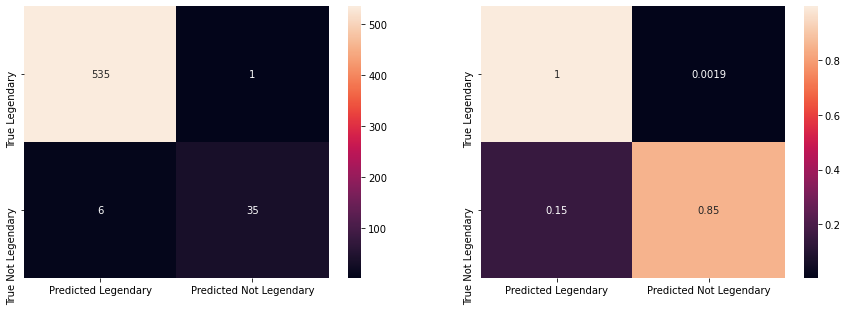

In [47]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Legendary', 'Not Legendary']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Legendary', 'True Not Legendary']
predicted_class_names = ['Predicted Legendary', 'Predicted Not Legendary']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

## Comparing Models

Let's compare the accuracy score of all the classifier models used above.

In [48]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,98.79
4,Random Forest,98.79
2,KNN,95.67
0,Logistic Regression,94.45
6,Perceptron,93.93
1,Support Vector Machines,92.89
7,Stochastic Gradient Decent,92.03
5,Naive Bayes,64.12


From the above table, we can see that Decision Tree and Random Forest classfiers have the highest accuracy score.

Between the two, we choose **Random Forest Classifier** as it has the ability to limit overfitting as compared to Decision Tree classifier.